# Previsão de renda

### 4 elementos importantes
- Esse notebook
- Streamlit com as análises
- Seu Github com o projeto
- Vídeo no readme do github mostrando o streamlit

## Etapa 1 CRISP - DM: Entendimento do negócio

<span style="color:red">Objetivo de negócio: prever a renda mensal de uma pessoa com base em características socioeconômicas.

Aplicação prática: pode ser usado em concessão de crédito, segmentação de clientes, análise de risco.

Questões de negócio:

Quais fatores mais influenciam a renda? (educação, tempo de emprego, idade, tipo de renda).

É possível prever a renda de forma confiável para novos clientes? </span>


## Etapa 2 Crisp-DM: Entendimento dos dados
<span style="color:red">Na segunda etapa é o entendimento dos dados. Foram fornecidas 14 variaveis mais a variavel resposta para verificação. </span>


### Dicionário de dados

<span style="color:red">Os dados estão dispostos em uma tabela com uma linha para cada cliente, e uma coluna para cada variável armazenando as características desses clientes. Colocamos uma cópia o dicionário de dados (explicação dessas variáveis) abaixo neste notebook:</span>


| Variável                | Descrição                                           | Tipo         |
| ----------------------- | --------------------------------------------------- | ------------ |
| data_ref                | Data de referência da informação do cliente         | Data         |
| id_cliente              | Identificador único do cliente                      | Numérico / Chave |
| sexo                    | Sexo do cliente (ex.: M, F)                         | Categórico   |
| posse_de_veiculo        | Indica se o cliente possui veículo                  | Binário (Sim/Não) |
| posse_de_imovel         | Indica se o cliente possui imóvel                   | Binário (Sim/Não) |
| qtd_filhos              | Quantidade de filhos do cliente                     | Numérico     |
| tipo_renda              | Fonte principal de renda (ex.: assalariado, autônomo)| Categórico  |
| educacao                | Nível de escolaridade do cliente                    | Categórico   |
| estado_civil            | Estado civil do cliente (solteiro, casado etc.)     | Categórico   |
| tipo_residencia         | Tipo de residência (alugada, própria, financiada)   | Categórico   |
| idade                   | Idade do cliente (em anos)                          | Numérico     |
| tempo_emprego           | Tempo de emprego do cliente (em anos)               | Numérico     |
| qt_pessoas_residencia   | Quantidade de pessoas que moram na residência       | Numérico     |
| renda                   | Renda mensal do cliente                             | Numérico     |




#### Carregando os pacotes
É considerado uma boa prática carregar os pacotes que serão utilizados como a primeira coisa do programa.

<span style="color:red">ESCREVER AQUI</span>


In [1]:
!pip install ydata_profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.1/400.1 kB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 23.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.7/679.7 kB 35.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 3.6 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=b12bfb6a6682f841f437b0cb5b7553c273ecff6d72000803a3538cfc2c3e9176
  Stored in directory: /root/.cache/pip/wheels/5f/d4/d7/4189b07b5902ee9f3ce0dbb14909fbe8037c39d6c63ffd49c9
Successfully built htmlmin
  Attempting uninstall: scipy
    Found existing installation: scipy 1.16.1
    Uninstalling scipy-1.16.1:
     

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from ydata_profiling import ProfileReport
from pandas_profiling import ProfileReport
from google.colab import files
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

/tmp/ipython-input-1644355422.py:6: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [3]:
files.upload()

Saving previsao_de_renda.csv to previsao_de_renda.csv


{'previsao_de_renda.csv': b',data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda\n0,2015-01-01,8682,F,False,True,1,Assalariado,Secund\xc3\xa1rio,Casado,Casa,36,3.5753424657534247,3.0,False,3369.24\n1,2015-01-01,12830,M,True,True,0,Empres\xc3\xa1rio,Secund\xc3\xa1rio,Casado,Casa,42,0.8602739726027397,2.0,False,6096.14\n2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753424657535,4.0,False,5658.98\n3,2015-01-01,16168,F,True,False,0,Empres\xc3\xa1rio,Secund\xc3\xa1rio,Casado,Casa,50,1.2082191780821918,2.0,False,7246.69\n4,2015-01-01,12438,M,False,False,0,Assalariado,Secund\xc3\xa1rio,Casado,Casa,52,13.873972602739727,2.0,False,4017.37\n5,2015-01-01,7409,M,False,True,0,Assalariado,Superior incompleto,Casado,Casa,46,15.561643835616438,2.0,False,5483.58\n6,2015-01-01,6913,F,False,True,0,Assalariado,Secund\xc3\xa1rio,Casado,Casa,51,5.04657534246575

#### Carregando os dados
O comando pd.read_csv é um comando da biblioteca pandas (pd.) e carrega os dados do arquivo csv indicado para um objeto *dataframe* do pandas.

<span style="color:red">ESCREVER AQUI</span>


In [4]:
renda = pd.read_csv('previsao_de_renda.csv')

In [5]:
renda

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,14995,2016-03-01,3678,M,True,True,1,Assalariado,Secundário,Casado,Casa,37,2.046575,3.0,False,1193.29
14996,14996,2016-03-01,3405,M,True,True,1,Servidor público,Superior completo,Casado,Estúdio,30,12.079452,3.0,False,2519.18
14997,14997,2016-03-01,7944,F,True,True,0,Assalariado,Secundário,Casado,Casa,40,2.161644,2.0,False,1586.85
14998,14998,2016-03-01,16019,F,False,True,0,Servidor público,Superior completo,Casado,Casa,47,3.295890,2.0,False,6975.39


In [6]:
renda.drop(['data_ref', 'Unnamed: 0', 'index'], axis=1, inplace=True)

In [7]:
renda1 = renda.copy()

In [8]:
renda.head()

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


#### Entendimento dos dados - Univariada
Nesta etapa tipicamente avaliamos a distribuição de todas as variáveis.

In [9]:
prof = ProfileReport(renda, explorative=True, minimal=True)
prof


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 13/13 [00:00<00:00, 54.13it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [10]:
prof.to_file('renda_analisys.html')

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

MOSTRA A ESTATISTICA DE CADA COLUNA DO DATAFRAME. NO INCIO PODE VERIFICAR O "ALERT", QUE MOSTRA COLUNAS QUE PODEM APRESENTAR PROBLEMAS QUANDO FORMOS FAZER A ANALISE


### Entendimento dos dados - Bivariadas




<span style="color:red">O GRAFICO MOSTRA QUE MAIS JOVENS TENDEM A SER MAUS PAGADORES, QUE TAMBEM PODE SER INDICADO POR ALGUMAS INFLUENCIAS EXTERNAS.</span>


In [26]:
print(renda1['mau'].value_counts())
print("\nTaxa de inadimplentes:")
print(renda1['mau'].mean())

mau
False    14638
True       362
Name: count, dtype: int64

Taxa de inadimplentes:
0.024133333333333333


/tmp/ipython-input-3426246012.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  biv = renda.groupby("faixa_idade")["mau"].mean()


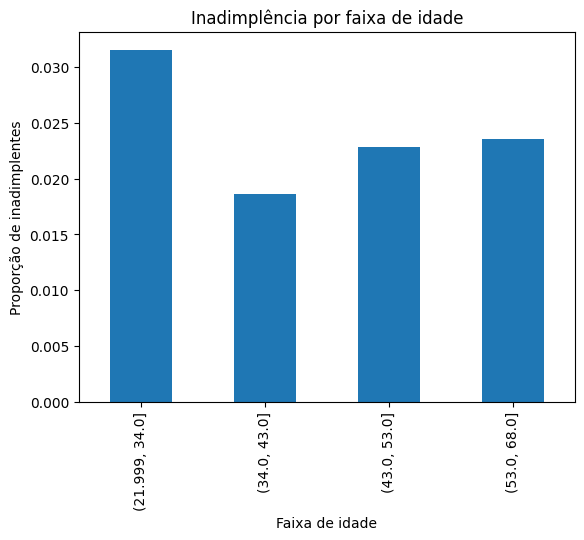

In [11]:
renda["mau"] = renda["mau"].astype(int)

renda["faixa_idade"] = pd.qcut(renda["idade"], 4)

biv = renda.groupby("faixa_idade")["mau"].mean()

biv.plot(kind="bar")
plt.ylabel("Proporção de inadimplentes")
plt.xlabel("Faixa de idade")
plt.title("Inadimplência por faixa de idade")
plt.show()

## Etapa 3 Crisp-DM: Preparação dos dados
Nessa etapa realizamos tipicamente as seguintes operações com os dados:

 - **seleção**: Já temos os dados selecionados adequadamente?
 - **limpeza**: Precisaremos identificar e tratar dados faltantes
 - **construção**: construção de novas variáveis
 - **integração**: Temos apenas uma fonte de dados, não é necessário integração
 - **formatação**: Os dados já se encontram em formatos úteis?



<span style="color:red">ESCREVER AQUI</span>


In [12]:
metadata = pd.DataFrame(renda.dtypes, columns = ['tipo'])

metadata['n_categorias'] = 0

for var in metadata.index:
    metadata.loc[var,'n_categorias'] = len(renda.groupby([var]).size())

metadata

/tmp/ipython-input-3177668754.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  metadata.loc[var,'n_categorias'] = len(renda.groupby([var]).size())


,tipo,n_categorias
sexo,object,2
posse_de_veiculo,bool,2
posse_de_imovel,bool,2
qtd_filhos,int64,8
tipo_renda,object,5
educacao,object,5
estado_civil,object,5
tipo_residencia,object,6
idade,int64,47
tempo_emprego,float64,2571


In [13]:
qtd_total = renda.shape[0]
qtd_adiplentes = renda[renda['mau'] == False].shape[0]
qtd_inadiplentes = renda[renda['mau'] == True].shape[0]

print(f'A proprorção de adiplentes é de {round(100*qtd_adiplentes / qtd_total, 2)}%')
print(f'A proprorção de inadiplentes é de {round(100 * qtd_inadiplentes / qtd_total, 2)}%')

A proprorção de adiplentes é de 97.59%
A proprorção de inadiplentes é de 2.41%


In [14]:
renda1.select_dtypes('object').describe().transpose()

,count,unique,top,freq
sexo,15000,2,F,10167
tipo_renda,15000,5,Assalariado,7826
educacao,15000,5,Secundário,8927
estado_civil,15000,5,Casado,10550
tipo_residencia,15000,6,Casa,13566


In [15]:
renda1.select_dtypes('number').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
qtd_filhos,15000.0,0.437267,0.760594,0.000000,0.000000,0.000000,1.000000,14.000000
idade,15000.0,43.841400,11.229170,22.000000,34.000000,43.000000,53.000000,68.000000
tempo_emprego,12466.0,7.750462,6.780216,0.191781,3.016438,6.016438,10.183562,42.906849
qt_pessoas_residencia,15000.0,2.219067,0.922352,1.000000,2.000000,2.000000,3.000000,15.000000
renda,15000.0,4624.632946,4628.571729,159.900000,1945.740000,3278.260000,5642.365000,89918.040000


In [16]:
renda1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sexo                   15000 non-null  object 
 1   posse_de_veiculo       15000 non-null  bool   
 2   posse_de_imovel        15000 non-null  bool   
 3   qtd_filhos             15000 non-null  int64  
 4   tipo_renda             15000 non-null  object 
 5   educacao               15000 non-null  object 
 6   estado_civil           15000 non-null  object 
 7   tipo_residencia        15000 non-null  object 
 8   idade                  15000 non-null  int64  
 9   tempo_emprego          12466 non-null  float64
 10  qt_pessoas_residencia  15000 non-null  float64
 11  mau                    15000 non-null  bool   
 12  renda                  15000 non-null  float64
dtypes: bool(3), float64(3), int64(2), object(5)
memory usage: 1.2+ MB


In [17]:
def convert_dummy(renda1, feature,rank=0):
    pos = pd.get_dummies(renda1[feature], prefix=feature)
    mode = renda1[feature].value_counts().index[rank]
    biggest = feature + '_' + str(mode)
    pos.drop([biggest],axis=1,inplace=True)
    renda1.drop([feature],axis=1,inplace=True)
    renda1=renda1.join(pos)
    return renda1

In [18]:
for var in metadata[metadata['tipo'] == 'object'].index:
    renda1 = convert_dummy(renda1, var)

In [19]:
renda1['tempo_emprego'] = renda1['tempo_emprego'].fillna(renda1['tempo_emprego'].mean())
renda1.head()

,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,mau,renda,sexo_M,tipo_renda_Bolsista,...,educacao_Superior incompleto,estado_civil_Separado,estado_civil_Solteiro,estado_civil_União,estado_civil_Viúvo,tipo_residencia_Aluguel,tipo_residencia_Com os pais,tipo_residencia_Comunitário,tipo_residencia_Estúdio,tipo_residencia_Governamental
0,False,True,1,36,3.575342,3.0,False,3369.24,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,True,0,42,0.860274,2.0,False,6096.14,True,False,...,False,False,False,False,False,False,False,False,False,False
2,True,True,2,31,8.065753,4.0,False,5658.98,True,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,0,50,1.208219,2.0,False,7246.69,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,0,52,13.873973,2.0,False,4017.37,True,False,...,False,False,False,False,False,False,False,False,False,False


In [20]:
renda1.dtypes, renda1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   posse_de_veiculo               15000 non-null  bool   
 1   posse_de_imovel                15000 non-null  bool   
 2   qtd_filhos                     15000 non-null  int64  
 3   idade                          15000 non-null  int64  
 4   tempo_emprego                  15000 non-null  float64
 5   qt_pessoas_residencia          15000 non-null  float64
 6   mau                            15000 non-null  bool   
 7   renda                          15000 non-null  float64
 8   sexo_M                         15000 non-null  bool   
 9   tipo_renda_Bolsista            15000 non-null  bool   
 10  tipo_renda_Empresário          15000 non-null  bool   
 11  tipo_renda_Pensionista         15000 non-null  bool   
 12  tipo_renda_Servidor público    15000 non-null 

(posse_de_veiculo                    bool
 posse_de_imovel                     bool
 qtd_filhos                         int64
 idade                              int64
 tempo_emprego                    float64
 qt_pessoas_residencia            float64
 mau                                 bool
 renda                            float64
 sexo_M                              bool
 tipo_renda_Bolsista                 bool
 tipo_renda_Empresário               bool
 tipo_renda_Pensionista              bool
 tipo_renda_Servidor público         bool
 educacao_Primário                   bool
 educacao_Pós graduação              bool
 educacao_Superior completo          bool
 educacao_Superior incompleto        bool
 estado_civil_Separado               bool
 estado_civil_Solteiro               bool
 estado_civil_União                  bool
 estado_civil_Viúvo                  bool
 tipo_residencia_Aluguel             bool
 tipo_residencia_Com os pais         bool
 tipo_residencia_Comunitário      

## Etapa 4 Crisp-DM: Modelagem
Nessa etapa que realizaremos a construção do modelo. Os passos típicos são:
- Selecionar a técnica de modelagem
- Desenho do teste
- Avaliação do modelo


<span style="color:red">ESCREVER AQUI</span>


### Rodando o modelo


<span style="color:red">ESCREVER AQUI</span>


In [21]:
X = renda1.drop('mau', axis=1)
y = renda['mau']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
X_train

,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda,sexo_M,tipo_renda_Bolsista,tipo_renda_Empresário,...,educacao_Superior incompleto,estado_civil_Separado,estado_civil_Solteiro,estado_civil_União,estado_civil_Viúvo,tipo_residencia_Aluguel,tipo_residencia_Com os pais,tipo_residencia_Comunitário,tipo_residencia_Estúdio,tipo_residencia_Governamental
9839,False,False,0,65,7.750462,2.0,1802.86,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9680,True,True,0,32,4.101370,1.0,2018.49,False,False,False,...,False,False,False,False,True,False,False,False,False,False
7093,False,True,0,63,7.750462,1.0,3248.73,False,False,False,...,False,False,False,False,True,False,False,False,False,False
11293,True,False,0,39,0.868493,1.0,3068.30,True,False,False,...,False,True,False,False,False,False,False,False,False,True
820,True,False,0,34,1.098630,2.0,1166.31,True,False,False,...,False,False,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5191,False,False,0,63,7.750462,1.0,3679.62,False,False,False,...,False,False,True,False,False,False,False,False,False,False
13418,True,False,0,36,0.621918,2.0,2142.89,True,False,True,...,False,False,False,False,False,False,False,False,False,False
5390,False,False,1,31,4.591781,3.0,2033.79,False,False,False,...,False,False,False,False,False,False,False,False,False,False
860,False,False,1,42,4.424658,2.0,1016.00,True,False,False,...,False,True,False,False,False,False,True,False,False,False


## Etapa 5 Crisp-DM: Avaliação dos resultados


<span style="color:red">ESCREVER AQUI</span>


## Etapa 6 Crisp-DM: Implantação
Nessa etapa colocamos em uso o modelo desenvolvido, normalmente implementando o modelo desenvolvido em um motor que toma as decisões com algum nível de automação.